
# Notebook Intentions

The purpose of this notebook is to simulate an amusement park. 


In [1]:
from park import Park
from behavior_reference import BEHAVIOR_ARCHETYPE_PARAMETERS

### Book Keeping

    - Version: dictates the location performance graphs are stored
    - Verbosity: controls much information is displayed during a simulation, increase to show more info
    - Show Plots: controls whether park plots are displayed in this notebook
    - RNG Seed: seeds random number generators to enforce identical results across runs/machines
    

In [2]:
VERSION = "20K All FP - MIKE"
VERBOSITY = 1
SHOW_PLOTS = True
RNG_SEED = 10


## Park
 
The park contains Agents, Attractions and Activities.

- Total Daily Agents: dictates how many agents visit the park within a day
- Hourly Percent: dictates what percentage of Total Daily Agents visits the park at each hour.  last hour is closing time and must have 0 arrivals.
- Perfect Arrivals: enforces that the exact amount of Total Daily Agents arrives during the day
- Expedited Pass Ability Percent: percent of agents aware of expeditied passes
- Expedited Threshold: acceptable queue wait time length before searching for an expedited pass
- Expedited Limit: total number of expedited pass an agent can hold at any given time


In [3]:
TOTAL_DAILY_AGENTS = 38047 #38047 actual average
PERFECT_ARRIVALS = True
HOURLY_PERCENT = {
    "10:00 AM": 27,
    "11:00 AM": 25,
    "12:00 PM": 13,
    "1:00 PM": 10,
    "2:00 PM": 8,
    "3:00 PM": 6,
    "4:00 PM": 2,
    "5:00 PM": 5,
    "6:00 PM": 3,
    "7:00 PM": 1,
    "8:00 PM": 0,
    "9:00 PM": 0,
    "10:00 PM": 0
}
EXP_ABILITY_PCT = 0.95
EXP_THRESHOLD = 30
EXP_LIMIT = 1

## Agents

The park is populated by agents. Agents visit attractions and activities. They make decisions about where to go based on their preferences, the popularity of attractions and activities and waiting times. Each Agent has a behavioral archetype.

- Ride Enthusiast: wants to stay for a long time, go on as many attractions as possible, doesn't want to visit activites, doesn't mind waiting
- Ride Favorer: wants to go on a lot of attractions, but will vists activites occasionally, will wait for a while in a queue
- Park Tourer: wants to stay for a long time and wants to see attractions and activities equally, reasonable about wait times
- Park Visitor: doesn't want to stay long and wants to see attractions and activities equally, inpatient about wait times
- Activity Favorer: doesn't want to stay long and prefers activities, reasonable about wait times
- Activity Enthusiast: wants to visit a lot of activities, reasonable about wait times

Archetypes can be tweaked and new archetypes can be added in `behavior_reference.py`. 

- Agent Archetype Distribution: dictates the probability an agent will have a particular behavioral archetype


In [4]:
AGENT_ARCHETYPE_DISTRIBUTION = {
    "ride_enthusiast": 10,
    "ride_favorer": 15,
    "park_tourer": 25,
    "park_visitor": 30,
    "activity_favorer": 15,
    "activity_enthusiast": 5,
}


## Attractions

Attractions are essentially rides within a park. 

- Attractions: list of dictionaries that describe the attractions within the park
    - Name: name of the attraction
    - Run Time: How long the attraction take to run, in minutes
    - Capacity: Maximium number of agents that can be on the attraction during a run
    - Popularity: Value from 1-10 that describes how popular an attraction is with respect to other attractions
    - Expedited Queue: Dictates whether the attraction has an expedited queue or not
    - Expedited Queue Ratio: Dictates what percentage of attraction capacity is devoted to members of the expedited queue
    - Child Eligible: Dictates whether children can ride the attraction
    - Adult Eligible: Dictates whether adults can ride the attraction

In [5]:
ATTRACTIONS = [
    {
        "name": "Ride of Passage",
        "run_time": 7,
        "park_area": "Pandora",
        "hourly_throughput": 1646,
        "num_vehicles": 4,
        "agents_per_vehicle": 48,
        "popularity": 10,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
    },
    {
        "name": "Serengeti Safari",
        "run_time": 20,
        "park_area": "Africa",
        "hourly_throughput": 3240,
        "num_vehicles": 30,
        "agents_per_vehicle": 36,
        "popularity": 9,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
    },
    {
        "name": "Annapurna Adventure",
        "run_time": 3,
        "park_area": "Asia",
        "hourly_throughput": 2040,
        "num_vehicles": 3,
        "agents_per_vehicle": 34,
        "popularity": 8,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": False,
        "adult_eligible": True,
    },
    {
        "name": "Kaveri Rapids",
        "run_time": 5,
        "park_area": "Asia",
        "hourly_throughput": 2160,
        "num_vehicles": 15,
        "agents_per_vehicle": 12,
        "popularity": 7,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
    },
    {
        "name": "Agave River Journey",
        "run_time": 5,
        "park_area": "Pandora",
        "hourly_throughput": 1440,
        "num_vehicles": 15,
        "agents_per_vehicle": 8,
        "popularity": 6,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
    },
    {
        "name": "Dinosaur",
        "run_time": 4,
        "park_area": "Dinoland USA",
        "hourly_throughput": 2520,
        "num_vehicles": 14,
        "agents_per_vehicle": 12,
        "popularity": 5,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": False,
        "adult_eligible": True,
    },
    {
        "name": "Primeval Hurl",
        "run_time": 2,
        "park_area": "Dinoland USA",
        "hourly_throughput": 1440,
        "num_vehicles": 12,
        "agents_per_vehicle": 4,
        "popularity": 4,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
    },
    {
        "name": "It's Difficult to Be an Insect",
        "run_time": 13,
        "park_area": "Discovery Island",
        "hourly_throughput": 1985,
        "num_vehicles": 1,
        "agents_per_vehicle": 430,
        "popularity": 3,
        "expedited_queue": True,
        "expedited_queue_ratio": 0.8,
        "child_eligible": True,
        "adult_eligible": True,
    },
    {
        "name": "TriceraTop Spin",
        "run_time": 4,
        "park_area": "Dinoland USA",
        "hourly_throughput": 960,
        "num_vehicles": 1,
        "agents_per_vehicle": 64,
        "popularity": 3,
        "expedited_queue": False,
        "expedited_queue_ratio": 0,
        "child_eligible": True,
        "adult_eligible": False,
    }
]

## Activities
Activities are everything to do within the park that isn't an attraction. 

- Activities: list of dictionaries that describe activities within the park
    - Name: name of the activity
    - Popularity: Value from 1-10 that describes how popular an activity is with respect to other activities
    - Mean Time: The expected time agents will spend at an activity

In [6]:
ACTIVITIES = [
    {
        "name": "sightseeing",
        "park_area": "Discovery Island",
        "popularity": 5,
        "mean_time": 5
    },
    {
        "name": "show",
        "park_area": "Discovery Island",
        "popularity": 5,
        "mean_time": 30
    },
    {
        "name": "merchandise",
        "park_area": "Discovery Island",
        "popularity": 5,
        "mean_time": 30
    },
    {
        "name": "food",
        "park_area": "Discovery Island",
        "popularity": 5,
        "mean_time": 45
    }
]

## Park Map
The park map is a reference of walking distance (minutes) between park areas.  Each attraction and activity is in one park area.

- PARK_MAP: dictionary of dictionaries that describe travel times between every possible pair of park areas.
    - SOURCE_PARK_AREA:
    - { DESTINATION_PARK_AREA: travel_time (in minutes), ... }

In [7]:
PARK_MAP = {
    "Discovery Island":
        {
            "Discovery Island": 1,  # distance for POI within same area
            "Pandora": 5,
            "Africa": 5,
            "Asia": 5,
            "Dinoland USA": 5,
            "Oasis": 3
        },
    "Pandora":
        {
            "Discovery Island": 5,
            "Pandora": 2,
            "Africa": 8,
            "Asia": 10,
            "Dinoland USA": 10,
            "Oasis": 8
        },
    "Africa":
        {
            "Discovery Island": 5,
            "Pandora": 8,
            "Africa": 2,
            "Asia": 6,
            "Dinoland USA": 10,
            "Oasis": 8
        },
    "Asia":
        {
            "Discovery Island": 5,
            "Pandora": 10,
            "Africa": 6,
            "Asia": 2,
            "Dinoland USA": 5,
            "Oasis": 8
        },
    "Dinoland USA":
        {
            "Discovery Island": 5,
            "Pandora": 10,
            "Africa": 10,
            "Asia": 5,
            "Dinoland USA": 1,
            "Oasis": 8
        },
    "Oasis":
        {
            "Discovery Island": 3,
            "Pandora": 8,
            "Africa": 8,
            "Asia": 8,
            "Dinoland USA": 8,
            "Oasis": 1
        }
}

## Entrance Park Area

This field defines the park area of the main gate, where agents start and end their park visit.

In [8]:
ENTRANCE_PARK_AREA = "Oasis"

## Plots

Set the Y limit of plots

In [9]:
PLOT_RANGE = {
    "Attraction Queue Length": 'auto',
    "Attraction Wait Time": 'auto',
    "Attraction Expedited Queue Length": 'auto',
    "Attraction Expedited Wait Time": 'auto',
    "Activity Vistors": 'auto',
    "Approximate Agent Distribution (General)": 1.0,
    "Approximate Agent Distribution (Specific)": 1.0,
    "Agent Arrivals and Departures": 'auto',
    "Attraction Average Wait Times": 'auto',
    "Attraction Expedited Queue Return Times": 'auto',
    "Agent Attractions Histogram": 1.0,
    "Attraction Total Visits": 'auto',
    "Expedited Pass Distribution": 'auto',
    "Age Class Distribution": 'auto',
}

## Simulation

Run the simulation here.

Time: 0
Total Agents in Park: 203
Attraction Wait Times (Minutes):
     It's Difficult to Be an Insect: 0.0
     TriceraTop Spin: 0.0
     Primeval Hurl: 0.0
     Dinosaur: 0.0
     Agave River Journey: 0.0
     Kaveri Rapids: 0.0
     Annapurna Adventure: 0.0
     Serengeti Safari: 0.0
     Ride of Passage: 0.0
Activity Visitor (Agents):
     sightseeing: 0
     show: 0
     merchandise: 0
     food: 0
--------------------------------------------------

Time: 60
Total Agents in Park: 10337
Attraction Wait Times (Minutes):
     It's Difficult to Be an Insect: 5.0
     TriceraTop Spin: 0.0
     Primeval Hurl: 0.0
     Dinosaur: 0.0
     Agave River Journey: 31.0
     Kaveri Rapids: 38.0
     Annapurna Adventure: 40.0
     Serengeti Safari: 13.0
     Ride of Passage: 50.0
Activity Visitor (Agents):
     sightseeing: 193
     show: 287
     merchandise: 298
     food: 335
--------------------------------------------------

Time: 120
Total Agents in Park: 19491
Attraction Wait Times (Minut

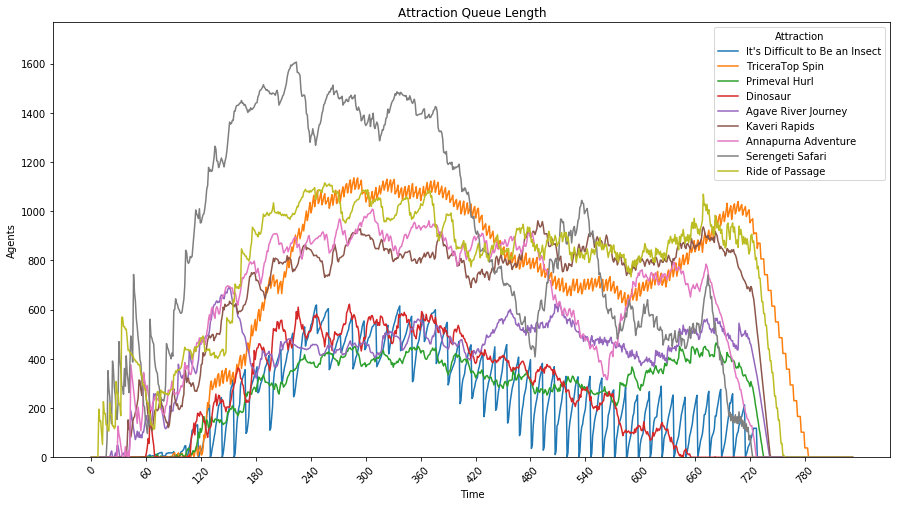

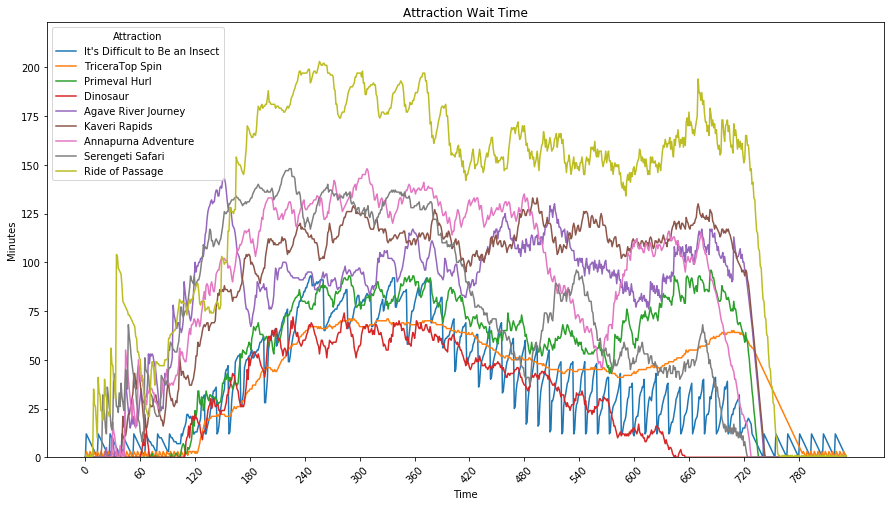

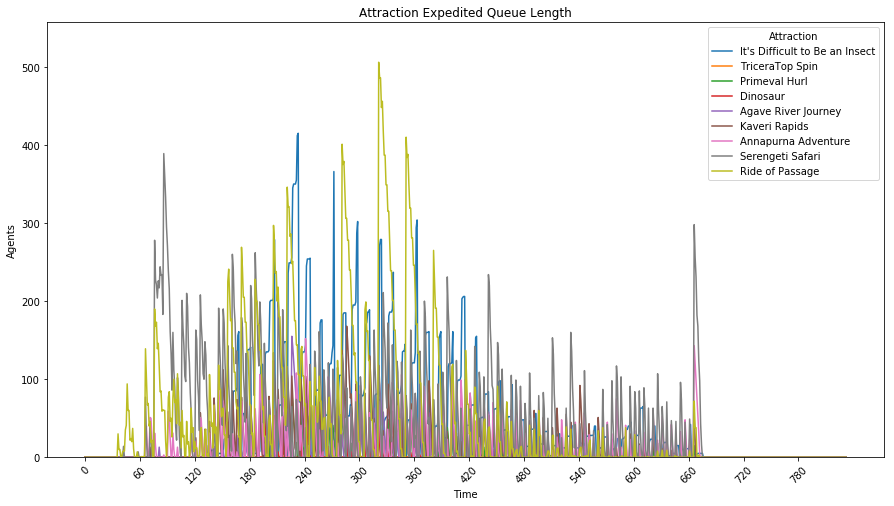

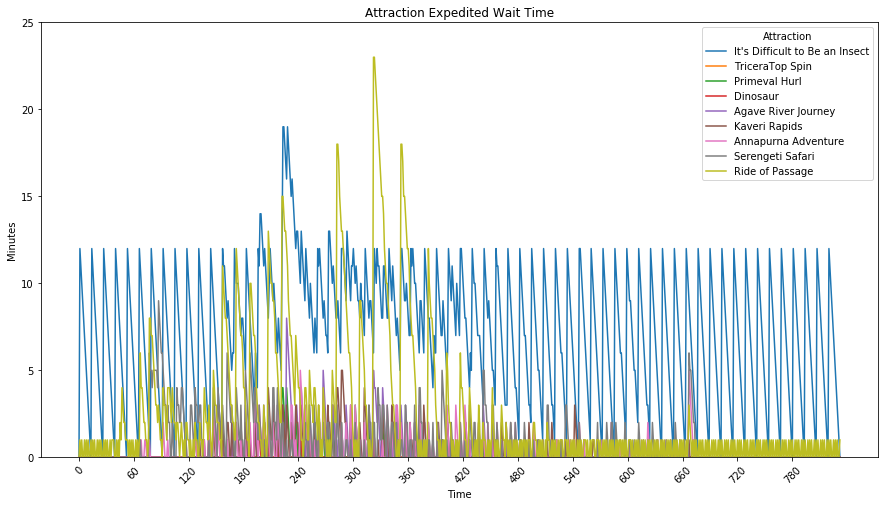

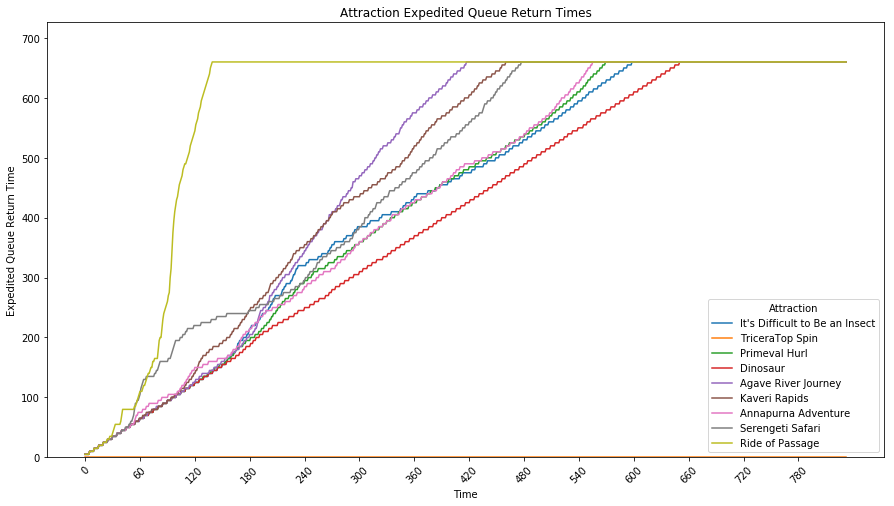

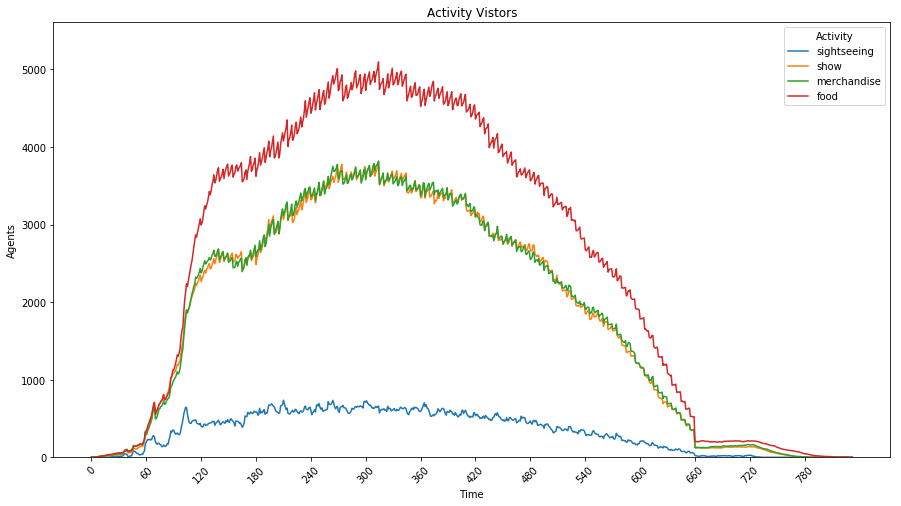

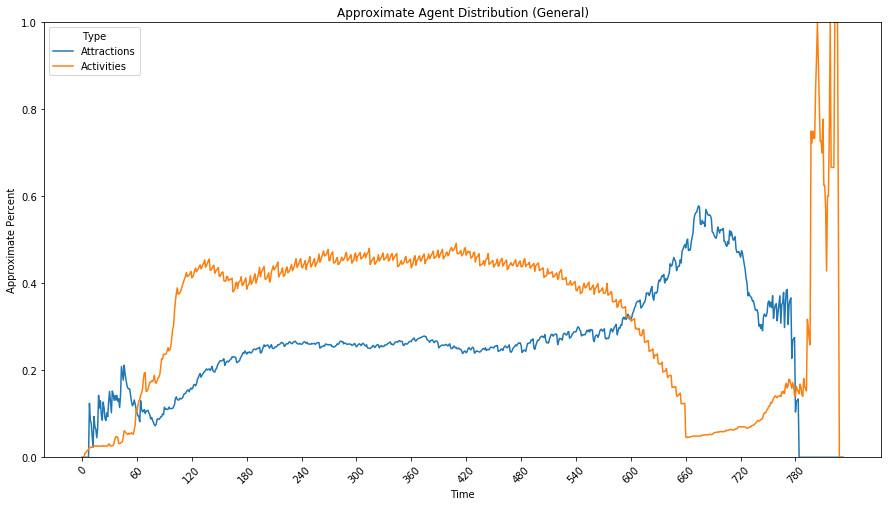

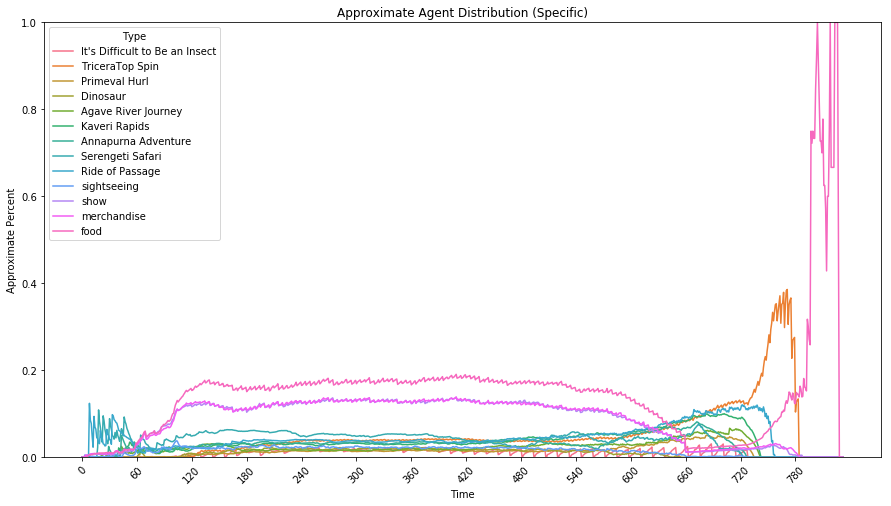

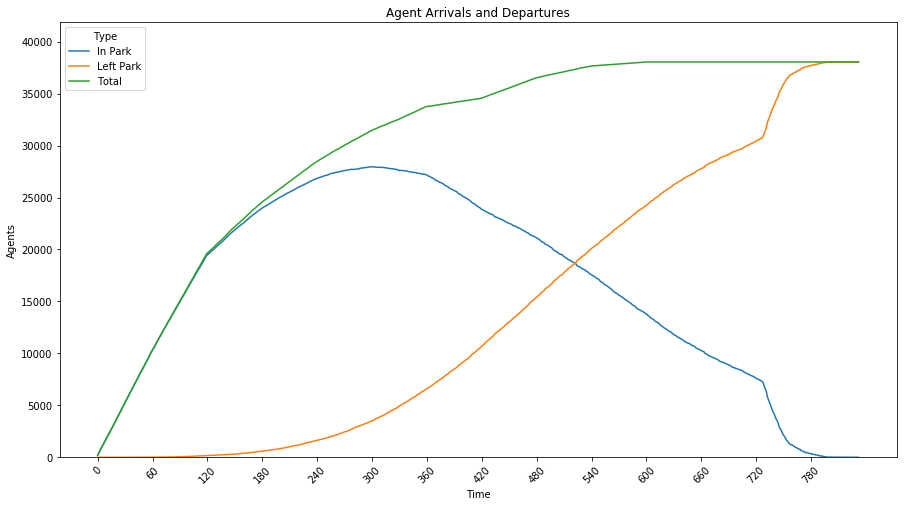

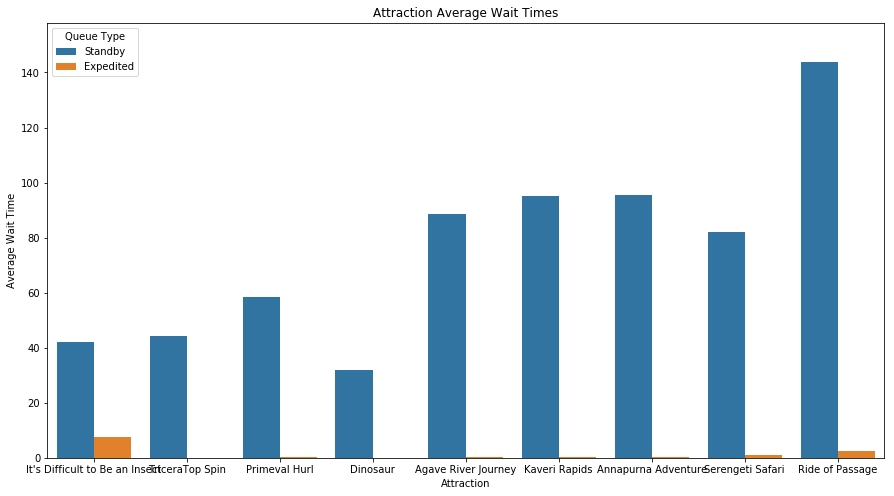

+--------------------------------+---------------------+--------------+
| Attraction                     |   Average Wait Time | Queue Type   |
|--------------------------------+---------------------+--------------|
| Ride of Passage                |                2.62 | Expedited    |
| It's Difficult to Be an Insect |                7.49 | Expedited    |
| Serengeti Safari               |                0.88 | Expedited    |
| TriceraTop Spin                |                0.00 | Expedited    |
| Primeval Hurl                  |                0.20 | Expedited    |
| Annapurna Adventure            |                0.39 | Expedited    |
| Dinosaur                       |                0.03 | Expedited    |
| Agave River Journey            |                0.36 | Expedited    |
| Kaveri Rapids                  |                0.43 | Expedited    |
| Serengeti Safari               |               81.90 | Standby      |
| Annapurna Adventure            |               95.64 | Standby

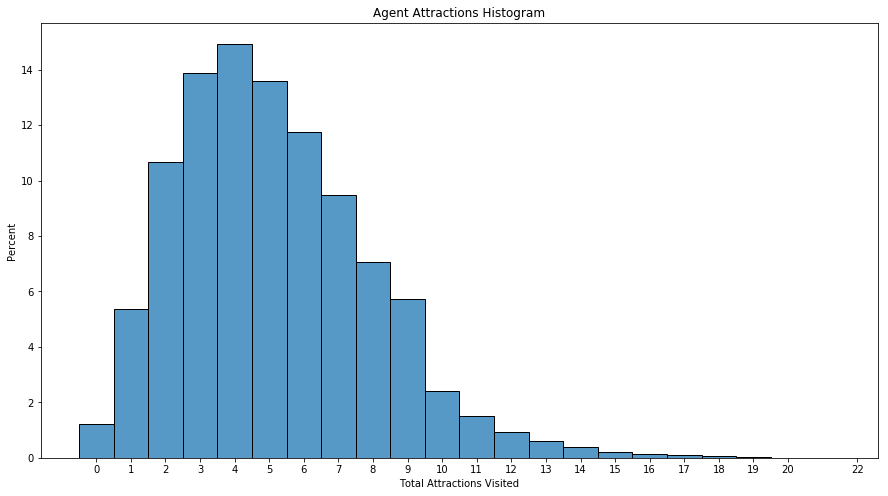

+----------+-----------------------------+
| Metric   |   Total Attractions Visited |
|----------+-----------------------------|
| count    |                    38047.00 |
| mean     |                        5.15 |
| std      |                        2.80 |
| min      |                        0.00 |
| 25%      |                        3.00 |
| 50%      |                        5.00 |
| 75%      |                        7.00 |
| max      |                       22.00 |
+----------+-----------------------------+


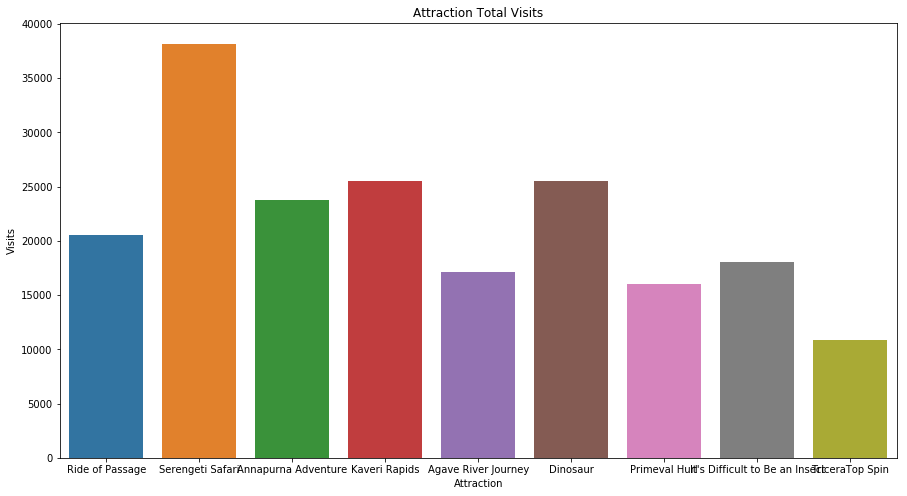

+--------------------------------+----------+
| Attraction                     |   Visits |
|--------------------------------+----------|
| Agave River Journey            |    17175 |
| Annapurna Adventure            |    23738 |
| Dinosaur                       |    25562 |
| It's Difficult to Be an Insect |    18097 |
| Kaveri Rapids                  |    25521 |
| Primeval Hurl                  |    16044 |
| Ride of Passage                |    20552 |
| Serengeti Safari               |    38186 |
| TriceraTop Spin                |    10905 |
+--------------------------------+----------+


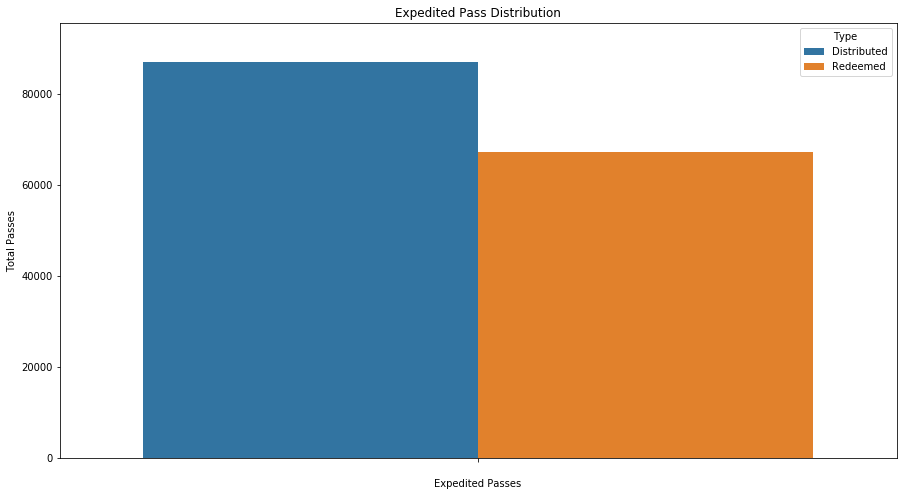

+--------------------+----------------+-------------+
| Expedited Passes   |   Total Passes | Type        |
|--------------------+----------------+-------------|
|                    |          86975 | Distributed |
|                    |          67269 | Redeemed    |
+--------------------+----------------+-------------+


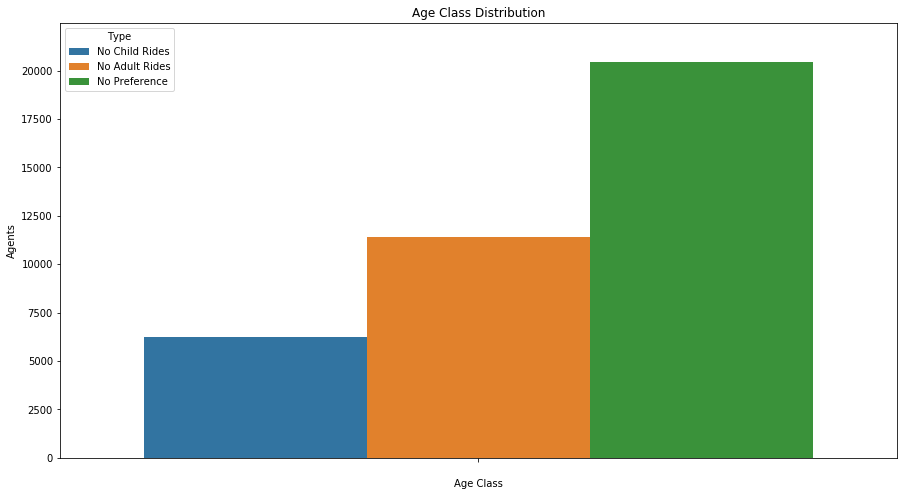

+-------------+----------+----------------+
| Age Class   |   Agents | Type           |
|-------------+----------+----------------|
|             |    11392 | No Adult Rides |
|             |     6237 | No Child Rides |
|             |    20418 | No Preference  |
+-------------+----------+----------------+
Agent ID: 37447
Agent Archetype: park_visitor
Agent arrived at park at time 528. Agent entered queue for Serengeti Safari at time 536. Agent boarded Serengeti Safari at time 567. Agent exited Serengeti Safari at time 587. Agent entered queue for Kaveri Rapids at time 594. Agent boarded Kaveri Rapids at time 624. Agent exited Kaveri Rapids at time 629. Agent entered queue for It's Difficult to Be an Insect at time 635. Agent boarded It's Difficult to Be an Insect at time 637. Agent exited It's Difficult to Be an Insect at time 650. Agent entered queue for Ride of Passage at time 656. Agent boarded Ride of Passage at time 695. Agent exited Ride of Passage at time 702. Agent entered que

In [10]:
# Initialize Park

park = Park(
    attraction_list=ATTRACTIONS,
    activity_list=ACTIVITIES,
    park_map=PARK_MAP,
    entrance_park_area=ENTRANCE_PARK_AREA,
    plot_range=PLOT_RANGE,
    random_seed=RNG_SEED,
    version=VERSION,
    verbosity=VERBOSITY
)

# Build Arrivals

park.generate_arrival_schedule(
    arrival_seed=HOURLY_PERCENT, 
    total_daily_agents=TOTAL_DAILY_AGENTS, 
    perfect_arrivals=PERFECT_ARRIVALS,
)

# Build Agents
park.generate_agents(
    behavior_archetype_distribution=AGENT_ARCHETYPE_DISTRIBUTION,
    exp_ability_pct=EXP_ABILITY_PCT,
    exp_wait_threshold=EXP_THRESHOLD,
    exp_limit=EXP_LIMIT
)

# Build Attractions + Activities
park.generate_attractions()
park.generate_activities()

# Pass Time
for _ in range((len(HOURLY_PERCENT.keys()) - 1) * 60):
    park.step()
    
print("Park is now closed.  Running overtime until all agents exit the park.")
overtime_counter = 0
while park.active_agents > 0:
    park.step()
    if overtime_counter % 60 == 0:
        print(f"{overtime_counter} minutes after park close: {park.active_agents} still in park.")
    overtime_counter += 1


# Save Parameters of Current Run
sim_parameters = {
    "VERSION": VERSION,
    "VERBOSITY": VERBOSITY,
    "SHOW_PLOTS": SHOW_PLOTS,
    "RNG_SEED": RNG_SEED,
    "TOTAL_DAILY_AGENTS": TOTAL_DAILY_AGENTS,
    "PERFECT_ARRIVALS": PERFECT_ARRIVALS,
    "HOURLY_PERCENT": HOURLY_PERCENT,
    "EXP_ABILITY_PCT": EXP_ABILITY_PCT,
    "EXP_THRESHOLD": EXP_THRESHOLD,
    "EXP_LIMIT": EXP_LIMIT,
    "AGENT_ARCHETYPE_DISTRIBUTION": AGENT_ARCHETYPE_DISTRIBUTION,
    "ATTRACTIONS": ATTRACTIONS,
    "ACTIVITIES": ACTIVITIES,
    "BEHAVIOR_ARCHETYPE_PARAMETERS": BEHAVIOR_ARCHETYPE_PARAMETERS,
}
park.write_data_to_file(
    data=sim_parameters, 
    output_file_path=f"{VERSION}/parameters", 
    output_file_format="json"
)

# Store + Print Data
park.make_plots(show=SHOW_PLOTS)
park.print_logs(N = 5)
#park.print_logs(selected_agent_ids = [778])

In [11]:
park.agents[2].log
#park.plot_range = PLOT_RANGE
#park.make_plots(show=SHOW_PLOTS)

"Agent arrived at park at time 0. Agent entered queue for Ride of Passage at time 8. Agent boarded Ride of Passage at time 9. Agent exited Ride of Passage at time 16. Agent balked at Ride of Passage at time 25 due to +32 minute posted wait. Agent entered queue for Agave River Journey at time 28. Agent boarded Agave River Journey at time 28. Agent exited Agave River Journey at time 33. Agent entered queue for Serengeti Safari at time 42. Agent boarded Serengeti Safari at time 47. Agent exited Serengeti Safari at time 67. Agent picked up an expedited pass for Annapurna Adventure at time 74. The expedited queue return time is in 16 minutes. Agent visited the activity sightseeing at time 80. Agent exited the activity sightseeing at time 84. Agent visited the activity food at time 86. Agent exited the activity food at time 90. Agent entered exp queue for Annapurna Adventure at time 96. Agent boarded Annapurna Adventure and redeemed their expedited queue pass at time 96. Agent exited Annapur

In [12]:
#import numpy as np
#rng = np.random.default_rng(10+23496)
#mean_time = 45
#rng.normal(mean_time, mean_time/2, 15)
#max((rng.normal(mean_time, mean_time/2, 1))[0], 1)
#park.activities['food'].state["visitor_time_remaining"]

#[
#            (ind, agent_id) for ind, agent_id in enumerate(park.activities['food'].state["visitors"])
#            if park.activities['food'].state["visitor_time_remaining"][ind] == 0
#        ]

park.agents[11748].log

"Agent arrived at park at time 69. Agent balked at gate at time 77 due to +28 minute posted wait. Agent balked at gate at time 86 due to +18 minute posted wait. Agent picked up an expedited pass for Serengeti Safari at time 95. The expedited queue return time is in 80 minutes. Agent visited the activity merchandise at time 101. Agent exited the activity merchandise at time 166. Agent visited the activity merchandise at time 168. Agent exited the activity merchandise at time 175. Agent entered exp queue for Serengeti Safari at time 181. Agent boarded Serengeti Safari and redeemed their expedited queue pass at time 185. Agent exited Serengeti Safari at time 205. Agent picked up an expedited pass for Kaveri Rapids at time 212. The expedited queue return time is in 93 minutes. Agent visited the activity show at time 218. Agent exited the activity show at time 283. Agent visited the activity show at time 285. Agent exited the activity show at time 305. Agent entered exp queue for Kaveri Rap

In [13]:
#park.attractions
#park.agents[2].state
desired_decision_type, valid_attractions = park.agents[2].decide_attraction_or_activity(park.attractions)
print(desired_decision_type)
print(valid_attractions)

activity
[]


In [14]:
from agent import calculate_utility
attractions_dict = park.attractions
self = park.agents[2]
park_map = park.park_map
#get valid attraction wait times
attraction_wait_times = {
    attraction_name: attraction.get_wait_time()
    for attraction_name, attraction in attractions_dict.items()
    if attraction_name in valid_attractions  # attractions_dict
}
# get valid attraction distances from agent (in minutes)
attraction_distances = {
    attraction_name: park_map[self.state["current_park_area"]][attraction.park_area]
    for attraction_name, attraction in attractions_dict.items()
    if attraction_name in valid_attractions
}
attraction_popularity_distribution = {
    attraction_name: parameters.popularity for attraction_name, parameters in attractions_dict.items()
    if attraction_name in valid_attractions
}
attraction_n_past = {
    attr_name:
        attr_history["times_completed"] for attr_name, attr_history in self.state["attractions"].items()
    if attr_name in valid_attractions
}
attraction_n_future = {
    attr_name:
        1 if attr_name in self.state["expedited_pass"] else 0 for attr_name in attractions_dict.keys()
    if attr_name in valid_attractions
}
# get utility of all valid attractions once
attraction_utilities = {
    attraction_name: calculate_utility(
        w_0=10,
        popularity=attraction_popularity_distribution[attraction_name],
        w_1=1,
        n_past=attraction_n_past[attraction_name],
        n_future=attraction_n_future[attraction_name],
        w_2=self.behavior["wait_discount_beta"],
        wait_time=attraction_wait_times[attraction_name],
        w_3=3,
        distance=attraction_distances[attraction_name]
    ) for attraction_name, parameters in attractions_dict.items()
    if attraction_name in valid_attractions
}
print(attraction_wait_times)
print(attraction_n_past)
print(attraction_utilities)

{}
{}
{}


In [15]:
from agent import softmax
#softmax([u for attr, u in attraction_utilities])

softmax(attraction_utilities)
#import numpy as np
#sum([np.exp(u) for u in attraction_utilities.values()])


C:\Users\Alex\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Alex\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Alex\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Alex\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\Alex\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{}

In [16]:
# what happens if we scale attraction_utilities first, and then apply softmax?
mu = np.mean([attraction_utilities[u] for u in attraction_utilities])
std = np.std([attraction_utilities[u] for u in attraction_utilities])
attr_util_norm = {
    u: (attraction_utilities[u] - mu) / std for u in attraction_utilities
}
attr_util_norm

NameError: name 'np' is not defined

In [ ]:
softmax(attr_util_norm)

In [ ]:
# design graph that shows time of sim vs return window start time for each attraction.
attrs = vars(park.attractions['Primeval Hurl'])
for attr in attrs:
    print(attr, type(attrs[attr]))


In [ ]:
# when are agents leaving the park?
arrivals = []
exits = []
desired_exits = []
for agent in park.agents.values():
    arrivals.append(agent.state["arrival_time"])
    exits.append(agent.state["exit_time"])
    desired_exits.append(agent.state["arrival_time"] + agent.behavior["stay_time_preference"])

In [ ]:
import pandas as pd
df = pd.DataFrame({'arrivals':arrivals,
                   'exits':exits,
                   'desired_exits':desired_exits})
df['exit_delta'] = df['exits'] - df['desired_exits']
df['exit_delta'].hist(bins=100)

In [ ]:
df['exit_delta'].mean()

# on average, agents are leaving the park around half an hour earlier than their archetype and arrival would suggest.
# what about agents who showed up late?
df_desired_leave_on_time = df[df['desired_exits'] < park.park_close]
len(df_desired_leave_on_time)

In [ ]:
print(df_desired_leave_on_time['exit_delta'].mean())
df_desired_leave_on_time['exit_delta'].hist(bins=100)

In [ ]:
# ok.  the issue isn't as severe when you account for the fact that plenty of agents' desired exit time was after park close.
# but it's still negatively biasing park stay times by roughly 11 minutes per agent on average.
# is this a big issue? no, not really. but now we know. something we can address down the road